In [3]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("regivm/retailtransactiondata")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\regivm\retailtransactiondata\versions\1


In [4]:
import dask.dataframe as dd
import pandas as pd 

In [5]:
file_path = "C:/Users/DELL/.cache/kagglehub/datasets/regivm/retailtransactiondata/versions/1/*.csv"


In [6]:
# Load a large dataset (for example, a CSV file) using Dask
df = dd.read_csv(file_path)

In [7]:
# Show the first few rows of the dataframe
print(df.head())

  customer_id  response
0      CS1112         0
1      CS1113         0
2      CS1114         1
3      CS1115         1
4      CS1116         1


In [8]:
#  Count the number of rows in the dataset
row_count = df.shape[0].compute()
print(f"Number of rows in the dataset: {row_count}")

Number of rows in the dataset: 131884


In [9]:
print(df.dtypes)

customer_id    string[pyarrow]
response                 int64
dtype: object


In [10]:
print(df.isnull().sum())  # Check for missing values in each column

Dask Series Structure:
npartitions=1
customer_id    int64
response         ...
Dask Name: sum, 5 expressions
Expr=(~ NotNull(frame=ArrowStringConversion(frame=FromMapProjectable(139ab49)))).sum()


In [11]:
numeric_columns = df.select_dtypes(include='number').columns
print(numeric_columns)  # This should list your numeric columns

Index(['response'], dtype='object')


In [22]:
# Convert columns to numeric if they are not already
df['response'] = pd.to_numeric(df['response'], errors='coerce')


In [13]:
#  Join two dataframes with a key column
other_df = dd.read_csv("C:/Users/DELL/.cache/kagglehub/datasets/regivm/retailtransactiondata/versions/1/Retail_Data_Transactions*.csv")
joined_df = df.merge(other_df, on="customer_id", how="inner")
print(joined_df.head())

  customer_id  response trans_date  tran_amount
0      CS1112         0  14-Jan-15           39
1      CS1112         0  16-Jul-14           90
2      CS1112         0  29-Apr-14           63
3      CS1112         0  04-Dec-14           59
4      CS1112         0  08-Apr-12           56


In [14]:
#  Count the number of rows in the joined dataset
row_count = joined_df.shape[0].compute()
print(f"Number of rows in the dataset: {row_count}")

Number of rows in the dataset: 2578829


In [15]:
print(joined_df.dtypes)

customer_id    string[pyarrow]
response                 int64
trans_date     string[pyarrow]
tran_amount              int64
dtype: object


In [16]:
# List the columns in the dataframe
print("Columns in the dataframe:", joined_df.columns)

Columns in the dataframe: Index(['customer_id', 'response', 'trans_date', 'tran_amount'], dtype='object')


In [17]:
# Convert the 'tran_amount' column to numeric data type
joined_df['tran_amount'] = dd.to_numeric(joined_df['tran_amount'], errors='coerce')

In [18]:
#  Calculate summary statistics like mean,standard deviation,minimum,maximum and quartile for numeric columns
numeric_columns = joined_df.select_dtypes(include='number').columns
summary_stats = joined_df["tran_amount"].describe().compute()
print(summary_stats)

count    2.578829e+06
mean     6.634931e+01
std      2.238178e+01
min      1.000000e+01
25%      4.900000e+01
50%      6.600000e+01
75%      8.500000e+01
max      1.050000e+02
Name: tran_amount, dtype: float64


In [19]:
#  Filter the dataset based on a condition
filtered_df = joined_df[joined_df["tran_amount"] > 100]
print(filtered_df.head())

   customer_id  response trans_date  tran_amount
11      CS1112         0  01-Mar-13          105
36      CS1114         1  29-Dec-13          105
63      CS1115         1  03-Sep-11          102
72      CS1115         1  16-Oct-12          104
88      CS1116         1  14-Feb-12          105


In [20]:
#  Group by a column and calculate aggregate statistics
grouped_df = joined_df.groupby("customer_id").agg({"tran_amount": "mean"}).compute()
print(grouped_df)

             tran_amount
customer_id             
CS1112         67.466667
CS1113         74.500000
CS1114         75.368421
CS1115         75.409091
CS1116         65.923077
...                  ...
CS7297         50.200000
CS7638         55.000000
CS7413         58.166667
CS8376         59.750000
CS8753         45.181818

[6889 rows x 1 columns]


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

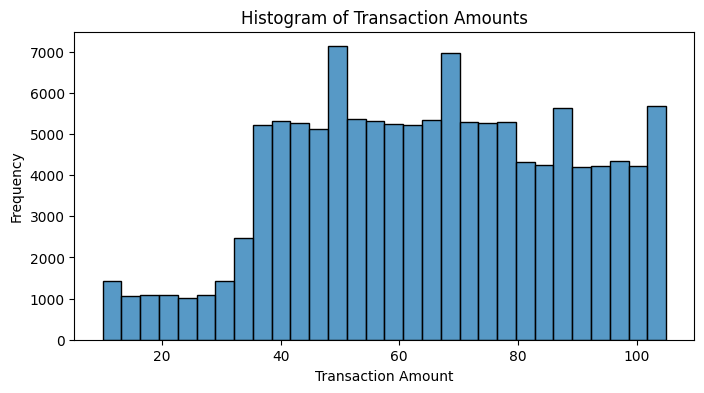

In [23]:
# 6. Data Visualization: Histogram of 'tran_amount
df_pd = df.compute()
plt.figure(figsize=(8, 4))
sns.histplot(df_pd['tran_amount'], bins=30)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()